[Insert millenial joke about avocados here]. For real though, if I had not eaten as many avocados as I had for the past few years I probably could have afford a home! 

Although I do consider myself quite savvy when it comes to buying avocados, I was curious if I am actually the avocado deal hunter I proclaim I am. Let's find out!

Data Source: http://www.hassavocadoboard.com/retail/volume-and-price-data

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Year should be a string, rather than integer. Might as well change it to a date time object while we're at it! 

In [34]:
data['year'] = data['year'].astype(str)
data['Date'] = pd.to_datetime(data['Date'])

Data Dictionary

<br/>Date - The date of the observation<br/>
<br/>AveragePrice - the average price of a single avocado<br/>
<br/>type - conventional or organic<br/>
<br/>year - the year<br/>
<br/>Region - the city or region of the observation<br/>
<br/>Total Volume - Total number of avocados sold<br/>
<br/>4046 - Total number of avocados with PLU 4046 sold<br/>
<br/>4225 - Total number of avocados with PLU 4225 sold<br/>
<br/>4770 - Total number of avocados with PLU 4770 sold<br/>


<b/><font size="2">Let's take a look at some summary statistics before jumping into visualization.</font><b/>

In [6]:
round(data.describe(),1)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0
mean,24.2,1.4,850644.0,293008.4,295154.6,22839.7,239639.2,182194.7,54338.1,3106.4
std,15.5,0.4,3453545.4,1264989.1,1204120.4,107464.1,986242.4,746178.5,243966.0,17692.9
min,0.0,0.4,84.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,10.0,1.1,10838.6,854.1,3008.8,0.0,5088.6,2849.4,127.5,0.0
50%,24.0,1.4,107376.8,8645.3,29061.0,185.0,39743.8,26362.8,2647.7,0.0
75%,38.0,1.7,432962.3,111020.2,150206.9,6243.4,110783.4,83337.7,22029.2,132.5
max,52.0,3.2,62505646.5,22743616.2,20470572.6,2546439.1,19373134.4,13384586.8,5719096.6,551693.6


Getting rid of the first column (used to count the number of occurances of the city for the year) and checking the result.

In [7]:
data = data.iloc[:, 1:]
data.head(1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


Taking a look at the distributions of each of the columns.

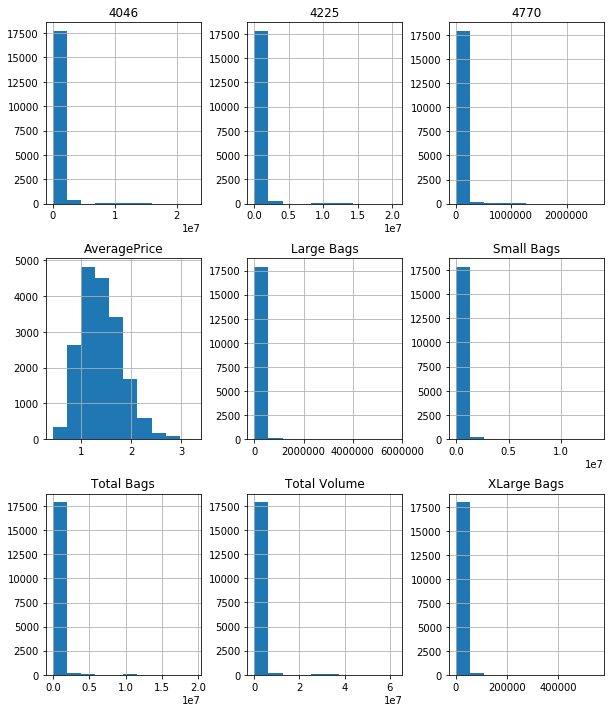

In [8]:
data.hist(figsize=(10,12));

Let's get a sense of how the price of avocados have changed over time. Since we have two types of avocados--conventional and organic-- we will look at them separately.

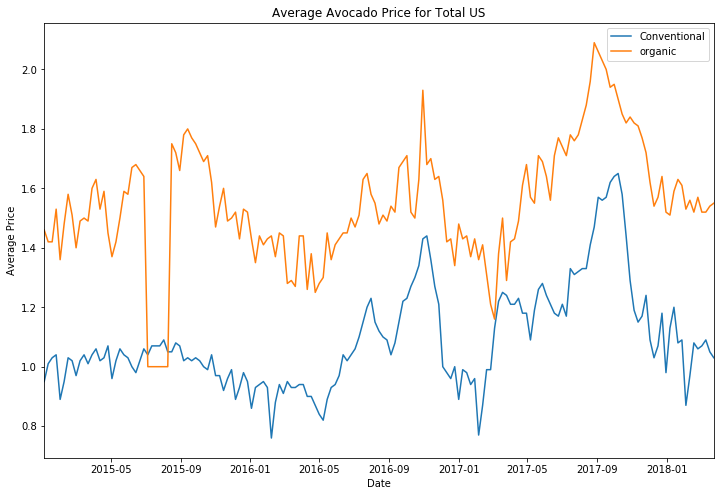

In [16]:
TotalUS_conv = data.loc[(data['type'] == 'conventional') & (data['region'] == 'TotalUS')].sort_values(by='Date')
TotalUS_organic = data.loc[(data['type'] == 'organic') & (data['region'] == 'TotalUS')].sort_values(by='Date')


plt.figure(figsize=(12,8))
plt.plot(TotalUS_conv['Date'], TotalUS_conv['AveragePrice']);
plt.plot(TotalUS_organic['Date'], TotalUS_organic['AveragePrice']);

plt.title('Average Avocado Price for Total US');
plt.xlabel('Date');
plt.legend(['Conventional', 'organic']);
plt.ylabel('Average Price');
plt.margins(0,0.05);

Interesting, looks like there is an issue with our data in the 2015 data for TotalUS. Doing a search on google didn't reveal much relating to anything in particular in the latter half of 2015. I will average the prices for every region to approximate what it the average price would be for each region.

In [63]:
data_exTotalUS = data.loc[data['region'] != 'TotalUS'].loc[:,['Date','AveragePrice']]
regions_count = len(set(data['region'])) - 1 #getting the total # of unique regions, except for "TotalUS"

problem_dates = data.loc[(data['region'] == 'TotalUS') & (data['AveragePrice'] == 1) & (data['type'] == 'organic')]['Date'] #hard coded 1 as it is clear organic > 1




In [64]:
data_exTotalUS

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
5,2015-11-22,1.26
6,2015-11-15,0.99
7,2015-11-08,0.98
8,2015-11-01,1.02
9,2015-10-25,1.07


In [42]:
problem_dates

11798   2015-08-09
11799   2015-08-02
11800   2015-07-26
11801   2015-07-19
11802   2015-07-12
11803   2015-07-05
Name: Date, dtype: datetime64[ns]

In [ ]:
data_corr = data.corr(method='spearman')

plt.figure(figsize=(4, 4)) #resize to see all labels
sns.heatmap(data_corr, xticklabels=True, yticklabels=True, vmin=-1, cmap='PiYG');